<b style='font-size:2em'>Using the py-phasesep package</b>

This tutorial introduce the basic functions of the `py-phasesep` package

In [1]:
import numpy as np

# import the package
import pde
import phasesep

## Reaction-diffusion PDEs


In [2]:
eq = phasesep.ReactionDiffusionPDE({'diffusivity': 1, 'reaction_flux': '- 0.1 * c'})

grid = pde.UnitGrid([32, 32])
field = pde.ScalarField.random_uniform(grid)

storage = pde.MemoryStorage()
sol = eq.solve(field, t_range=100, dt=0.01, tracker=storage.tracker());

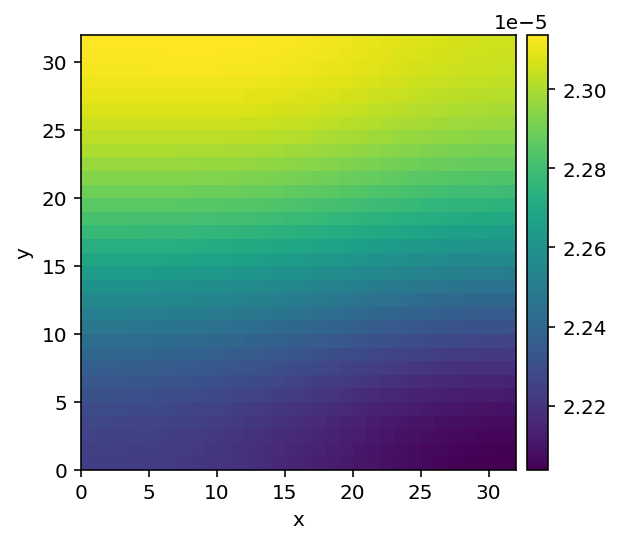

In [3]:
sol.plot(colorbar=True);

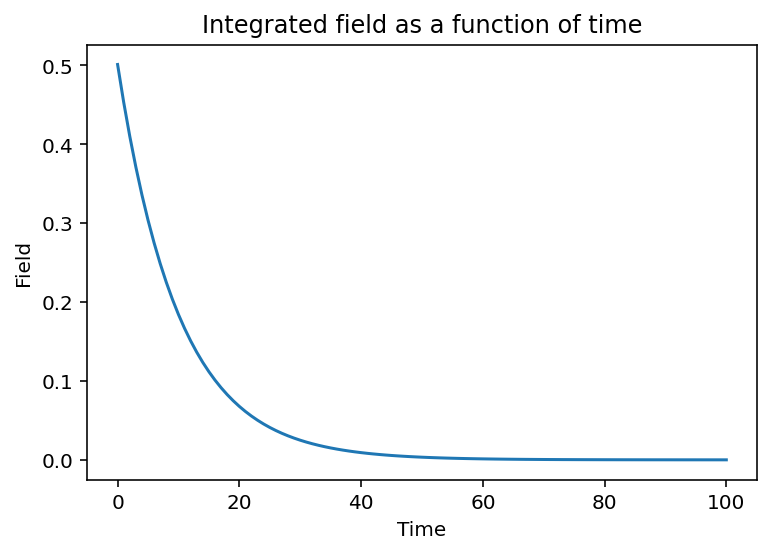

In [4]:
pde.plot_magnitudes(storage, title='Integrated field as a function of time');

## General free energies

In [5]:
f = phasesep.GinzburgLandau2Components(slope=0.01)
f.expression

'0.5 * c**2 * (1 - c)**2 + 0.01 * c'

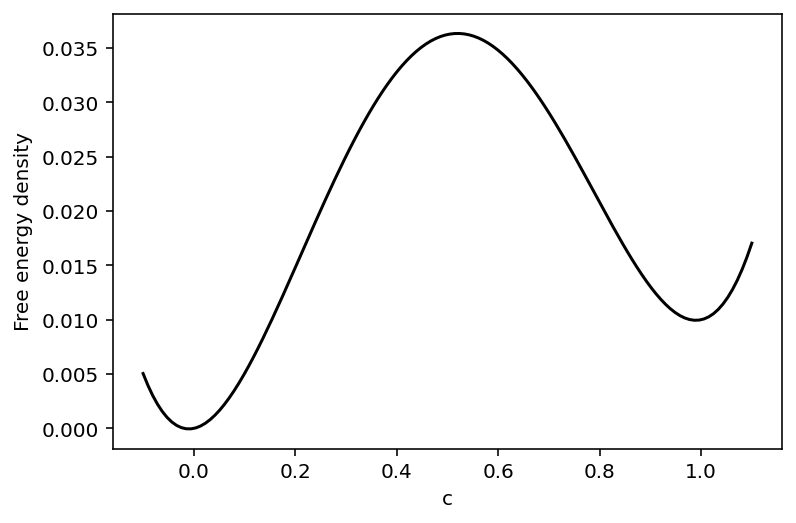

In [6]:
f.plot(extent=[-0.1, 1.1]);

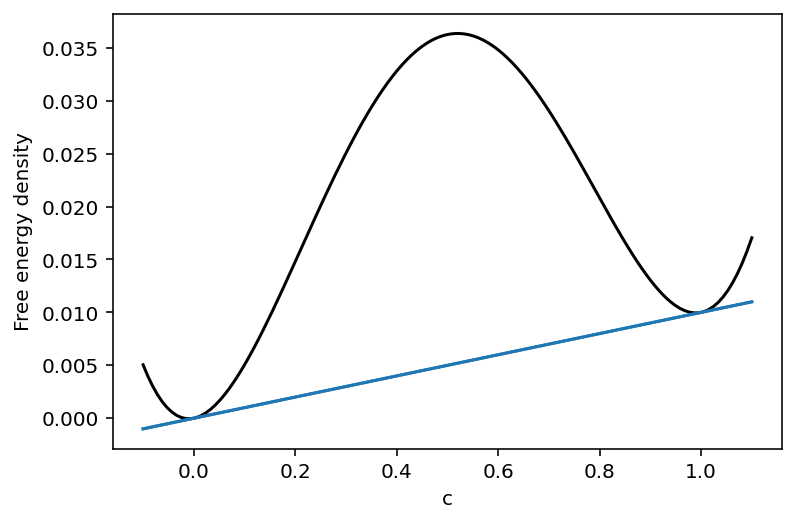

In [7]:
f.plot(extent=[-0.1, 1.1], laplace_pressure=0);

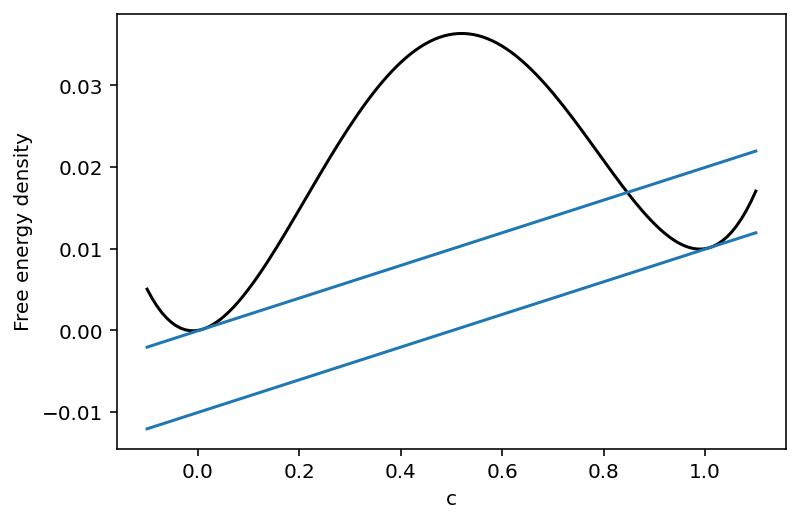

In [8]:
f.plot(extent=[-0.1, 1.1], laplace_pressure=0.01);

Free energies can also be created from mathematical expressions

In [9]:
f2 = phasesep.FreeEnergy(f.expression)
f2.expression

'c*(0.5*c*(c - 1.0)**2 + 0.01)'

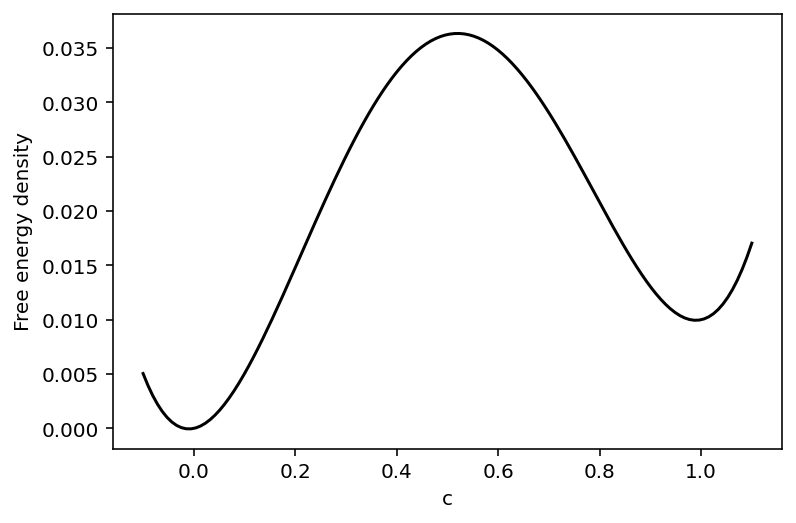

In [10]:
f2.plot(extent=[-0.1, 1.1]);

These free energies can be used in phase field simulations

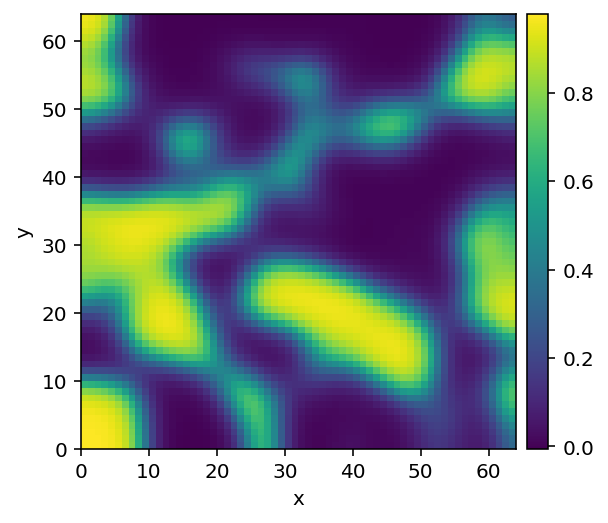

In [11]:
eq = phasesep.AllenCahnPDE({'free_energy': f2})
grid = pde.UnitGrid([64, 64])
state = pde.ScalarField.random_uniform(grid)

result = eq.solve(state, t_range=8, dt=0.01)
result.plot(colorbar=True);

## Cahn-Hilliard equations

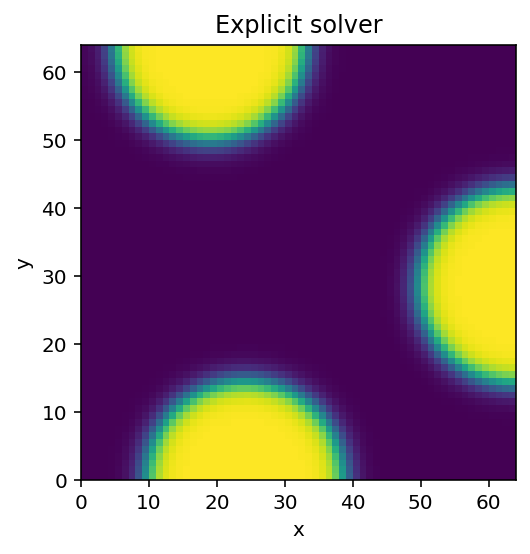

In [12]:
eq = phasesep.CahnHilliardExtendedPDE({'free_energy': 'ginzburg-landau'})
grid = pde.UnitGrid([64, 64])
state = pde.ScalarField.random_uniform(grid, 0., 0.5)

result1 = eq.solve(state, t_range=1e4, dt=0.01)
result1.plot(title='Explicit solver');

Using a semi-implicit solver can accelerate the simulation

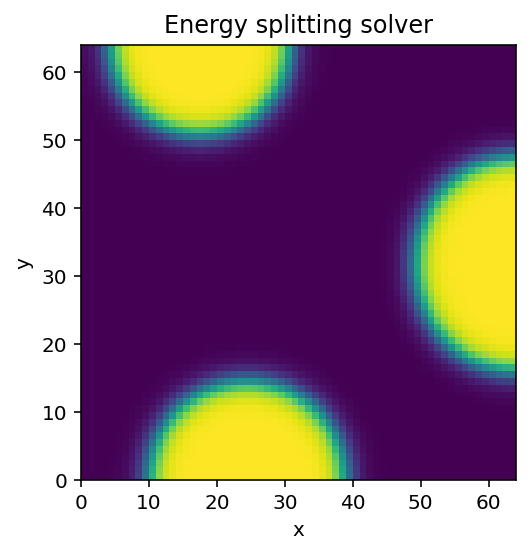

In [13]:
result2 = eq.solve(state, method='energy_splitting', t_range=1e4, dt=10)
result2.plot(title='Energy splitting solver');

This class allows for concentration dependent mobilties

In [14]:
eq = phasesep.CahnHilliardExtendedPDE({'mobility': "c * (1 - c)"})
grid = pde.UnitGrid([32, 32])
state = pde.ScalarField.random_uniform(grid)

result = eq.solve(state, t_range=1e2, dt=0.005);

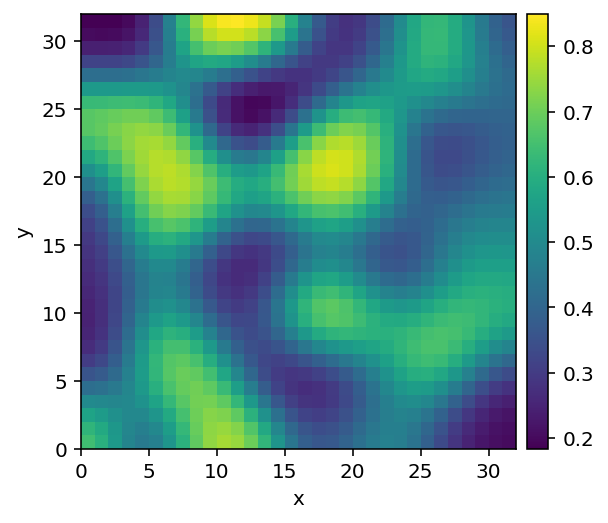

In [15]:
result.plot(colorbar=True);

Chemical reactions can also be added conveniently

In [16]:
eq = phasesep.CahnHilliardExtendedPDE({'reaction_flux': "1e-3 * (1 - exp(-mu))"})
grid = pde.UnitGrid([32, 32])
state = pde.ScalarField.random_uniform(grid, 0.2, 0.3)

result = eq.solve(state, t_range=10, dt=0.005)

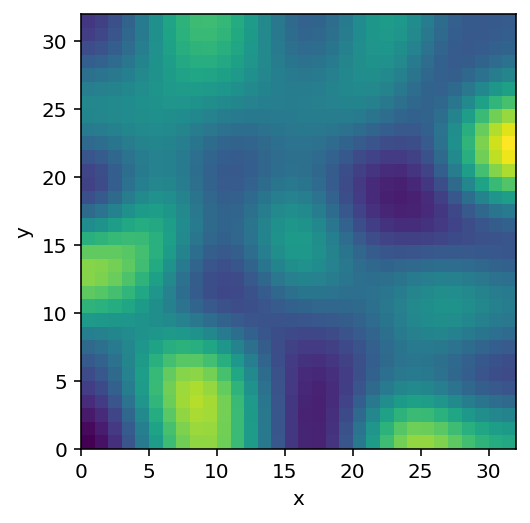

In [17]:
result.plot();

To simplify the analysis of non-equilibrium systems, we also provide a simple wrapper `CahnHilliardNonEqPDE` that sets the correct reactions based on reaction mobilities.

In [18]:
eq = phasesep.CahnHilliardNonEqPDE({'driving': 1})

## Multicomponent Cahn-Hilliard

In [19]:
f = phasesep.FloryHugginsNComponents(chis=4, num_comp=3)  # initialize free energy

# initialize a single chemical reaction
r = phasesep.Reaction(stoichiometry=[1, 0, -1],
                      reaction_flux="1e-3 * (1 - exp(-mu[0]))")
eq = phasesep.CahnHilliardMultiplePDE({'free_energy': f, 'reactions': [r]})

grid = pde.UnitGrid([32, 32])  # generate grid
state = pde.FieldCollection([pde.ScalarField.random_uniform(grid, 0., 0.5, label='Component A'),
                             pde.ScalarField.random_uniform(grid, 0., 0.5, label='Component B')])

result = eq.solve(state, t_range=10, dt=0.0002)

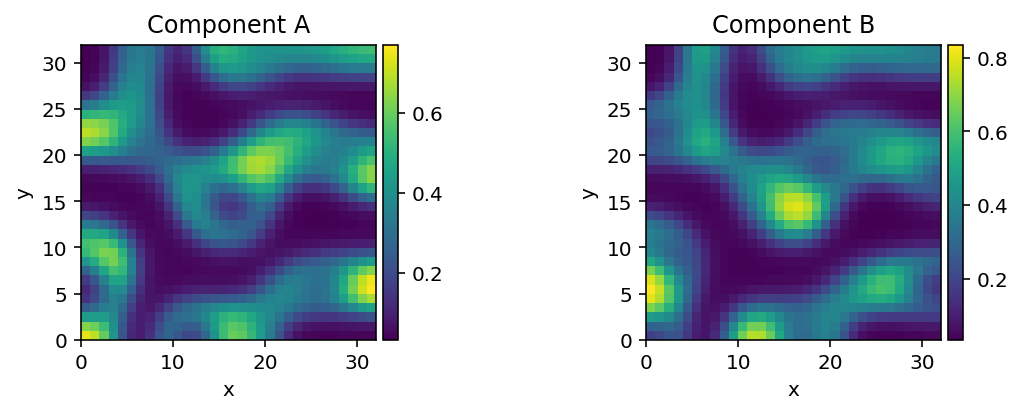

In [20]:
result.plot(colorbar=True);

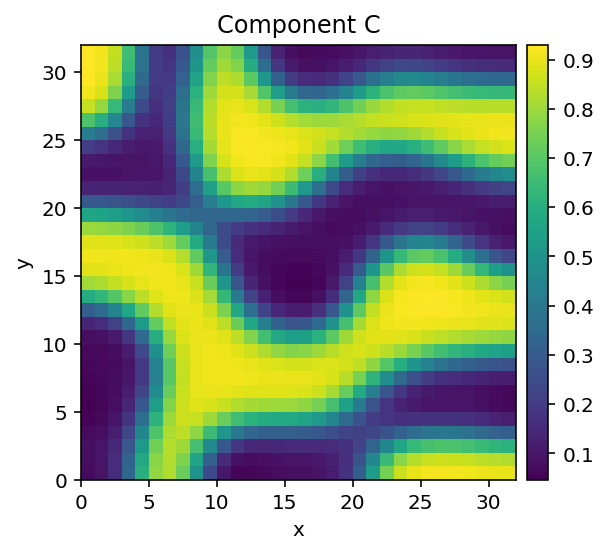

In [21]:
compC = 1 - result[0] - result[1]
compC.plot(title='Component C', colorbar=True);